<a href="https://colab.research.google.com/github/Zainch032/Final_Lab/blob/main/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training data shape: (60000, 28, 28, 3)
Test data shape: (10000, 28, 28, 3)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.4787 - loss: 1.5184 - val_accuracy: 0.7633 - val_loss: 0.6173
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.7550 - loss: 0.6441 - val_accuracy: 0.7865 - val_loss: 0.5354
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.7997 - loss: 0.5369 - val_accuracy: 0.8260 - val_loss: 0.4741
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.8233 - loss: 0.4890 - val_accuracy: 0.8397 - val_loss: 0.4403
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.8332 - loss: 0.4593 - val_accuracy: 0.8497 - val_loss: 0.4147
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.8452 - loss: 0.4334 - val_accuracy: 0.8523 - val_loss: 0.4042
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.8543 - loss: 0.4081 - val_accuracy: 0.8612 - val_loss: 0.3891
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.8604 - loss: 0.3882 - 

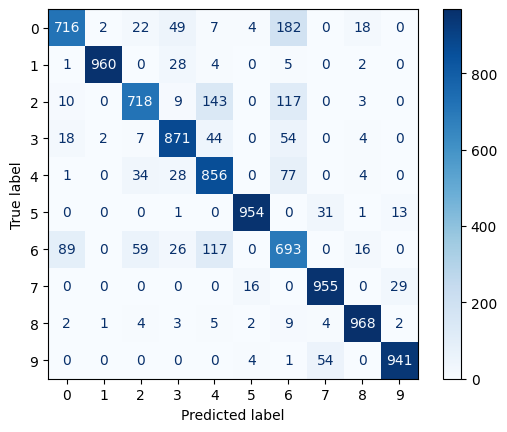

Accuracy: 0.8632
Test Loss: 0.3800


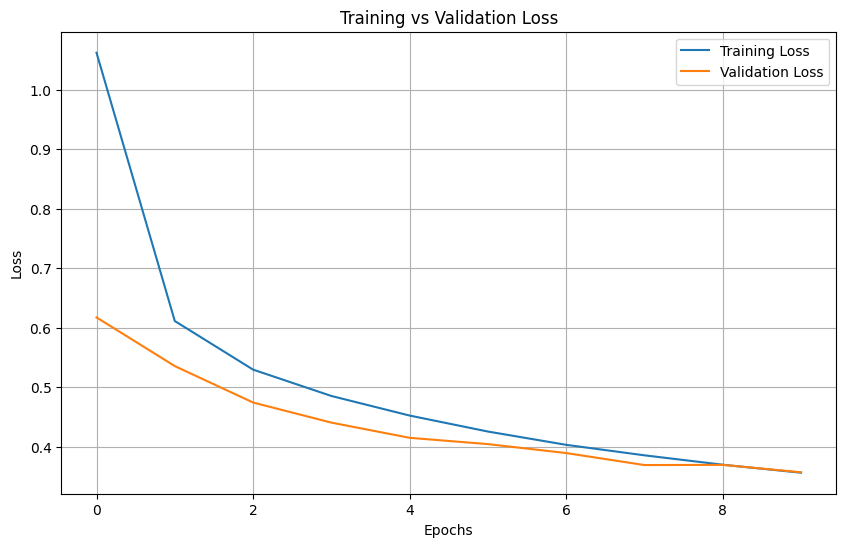

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

def load_and_preprocess_data():

    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

    # Normalize pixel values to range [0, 1]
    X_train, X_test = X_train / 255.0, X_test / 255.0

    X_train = np.repeat(X_train[..., np.newaxis], 3, axis=-1)  # Convert to (28, 28, 3)
    X_test = np.repeat(X_test[..., np.newaxis], 3, axis=-1)    # Convert to (28, 28, 3)


    y_train = to_categorical(y_train, 10)  # One-hot encode for 10 classes
    y_test = to_categorical(y_test, 10)    # One-hot encode for 10 classes


    return X_train, y_train, X_test, y_test

# Build a CNN model with more layers, strides, and pooling
def build_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3), padding='same', strides=2),  # Stride of 2
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),  # Stride of 2
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same', strides=1),  # Stride of 1
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
    ])
    return model

# Train, evaluate, and plot confusion matrix
def train_and_evaluate():
    # Load and preprocess data
    X_train, y_train, X_test, y_test = load_and_preprocess_data()

    # Print the shapes of the datasets
    print("Training data shape:", X_train.shape)
    print("Test data shape:", X_test.shape)

    cnn_model = build_cnn_model()
    cnn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

    # Evaluate the model
    test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=2)
    print(f"\nTest accuracy: {test_acc:.4f}")

    # Predictions and confusion matrix
    y_pred = np.argmax(cnn_model.predict(X_test), axis=1)
    cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    # Accuracy and loss
    acc = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")

    # Plot training vs validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Run the entire pipeline
if __name__ == "__main__":
    train_and_evaluate()


